# **Proyecto Final** ⚽️🏆

In [ ]:
# Importamos las librerías que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Leemos el primer archivo
df_mundial = pd.read_excel('world_cups.xlsx')

In [ ]:
df_mundial.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [ ]:
df_mundial.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


**Pregunta 1:**
<br/>
¿De cuántos mundiales tenemos información?

In [ ]:
# Contamos la cantidad de filas del dataframe
df_mundial.shape[0]

20

**Pregunta 2:** 
<br/>
Obtener el nombre completo de cada mundial

In [ ]:
df_mundial['Name Worldcup'] = df_mundial['Country'] +' '+ df_mundial['Year'].astype(str) 
df_mundial['Name Worldcup']

**Pregunta 3:** 
<br/>
Obtener los países que campeonaron de local

In [ ]:
campeones_local = df_mundial[df_mundial['Country']==df_mundial['Winner']]
campeones_local['Country']

0       Uruguay
1         Italy
7       England
10    Argentina
15       France
Name: Country, dtype: object

**Pregunta 4:**
<br/>
20 partidos de mundial con más goles

In [ ]:
# Leemos el segundo archivo
df_mundial2 = pd.read_excel('world_cups2.xlsx')

In [ ]:
df_mundial2.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [ ]:
df_mundial2.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [ ]:
# Obtenemos el total de goles por partido
df_mundial2['Total Goals'] = df_mundial2['Home Team Goals']+df_mundial2['Away Team Goals']


In [ ]:
df_mundial2['Total Goals'].head()

0    5
1    3
2    3
3    4
4    1
Name: Total Goals, dtype: int64

In [ ]:
# Juntamos a los dos equipos del partido

df_mundial2['Match'] = df_mundial2['Home Team Name']+'-'+df_mundial2['Away Team Name']

In [ ]:
df_mundial2.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals,Match
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5,France-Mexico
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3,USA-Belgium
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3,Yugoslavia-Brazil
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4,Romania-Peru
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1,Argentina-France


In [ ]:
# Ordenamos en forma descendente por el total de goles por partido

df_mundial2 = df_mundial2.sort_values(by='Total Goals', ascending=False)

In [ ]:
# Nos quedamos con los primeros 20
df_mundial2['Match'].head(20)

94        Austria-Switzerland
312       Hungary-El Salvador
40              Brazil-Poland
87         Hungary-Germany FR
105           France-Paraguay
10           Argentina-Mexico
80     Hungary-Korea Republic
91          Germany FR-Turkey
243          Yugoslavia-Zaire
134         France-Germany FR
81            England-Belgium
46                Sweden-Cuba
70              Brazil-Sweden
148     Soviet Union-Colombia
826            Brazil-Germany
583      Germany-Saudi Arabia
24                  Italy-USA
66            Uruguay-Bolivia
195        Portugal-Korea DPR
396      Soviet Union-Belgium
Name: Match, dtype: object

**Pregunta 5:**
<br/>
Obtener los goles promedio por partido para cada mundial

In [ ]:
# Forma 1: Usando el 2do dataset
df_aux = df_mundial2.groupby('Year').mean()

In [ ]:
df_aux.rename(columns= {'Total Goals': 'Avg Goals'})

,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,Avg Goals
Year,,,,,,,,
1930,3.277778,0.611111,32808.277778,1.500000,0.277778,2.124444e+02,1.092500e+03,3.888889
1934,2.823529,1.294118,21352.941176,1.176471,0.529412,1.040412e+03,1.120706e+03,4.117647
1938,3.388889,1.277778,20872.222222,1.111111,0.555556,9.973333e+02,1.162000e+03,4.666667
1950,3.136364,0.863636,47511.181818,1.500000,0.363636,2.082727e+02,1.204091e+03,4.000000
1954,4.192308,1.192308,29561.807692,1.769231,0.500000,4.822692e+02,1.270077e+03,5.384615
1958,2.514286,1.085714,23423.142857,0.971429,0.571429,4.218571e+02,1.381743e+03,3.600000
1962,2.156250,0.625000,27911.625000,0.906250,0.312500,4.519062e+02,1.490906e+03,2.781250
1966,2.156250,0.625000,48847.968750,0.906250,0.343750,4.592812e+02,1.636969e+03,2.781250
1970,2.250000,0.718750,50124.218750,0.656250,0.343750,4.717188e+02,1.827469e+03,2.968750


In [ ]:
# Segunda forma: Usando el primer dataset

df_mundial['Avg Goals'] = df_mundial['GoalsScored']/df_mundial['MatchesPlayed']
df_mundial

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Name Worldcup,Avg Goals
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,Uruguay 1930,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,Italy 1934,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,France 1938,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,Brazil 1950,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,Switzerland 1954,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.81,Sweden 1958,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172,Chile 1962,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135,England 1966,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975,Mexico 1970,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753,Germany 1974,2.552632


**Pregunta 6:**
<br/>
Hacer un gráfico de barras con la cantidad de goles por mundial.

Text(0, 0.5, 'Total Goals Scored')

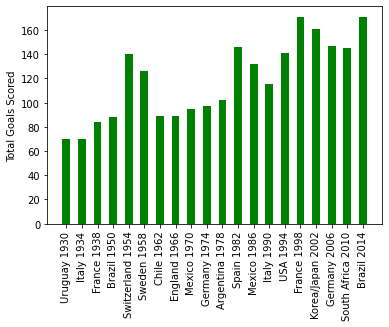

In [ ]:
plt.bar(df_mundial['Name Worldcup'], df_mundial['GoalsScored'], width=0.5, color='green')
plt.xticks(rotation=90)
plt.ylabel('Total Goals Scored')
